## Exploring and Processing the Data:

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Get the raw data as pandas dataframe.
raw_data = os.path.join(os.pardir,'data','raw','Iris.csv')
df = pd.read_csv(raw_data,index_col='Id')

### Basic Structure of dataset:

In [3]:
#Checking the shape of the dataset:
print(f"The Dataset is having {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset is having 150 rows and 5 columns


In [4]:
#Inspecting the dataset for null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Insight: No null values to be seen in dataset.

In [5]:
#Renaming the columns for convenience
def renaming_col(df):
    column_names = list(df.columns)
    renaming_dict = dict(zip([i for i in column_names[:-1] ] ,["SL","SW","PL","PW"]))
    df.rename(columns=renaming_dict,inplace=True)

In [6]:
#Renaming values of column Species for convenience:
def renaming_species(df):
    df.Species = df.Species.apply(lambda x: x[5:])
    return df

In [7]:
renaming_col(df)
df = renaming_species(df)

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SL,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SW,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PL,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PW,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### UNIVARIATE ANALYSIS:
- We'll try to do Single Feature Analysis:
    - histogram
    - distplot
    - box plot
    - bar plot

In [9]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 18,8
plt.style.use('fivethirtyeight')

In [10]:
#Distinguishing between different type of features:
numeric_data = df.select_dtypes('number')
categorical_data = df.select_dtypes(exclude='number')
display(numeric_data.head())
display(categorical_data.head())

,SL,SW,PL,PW
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


,Species
Id,
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa


In [11]:
# Balanced dataset is given to us:
df.Species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: Species, dtype: float64

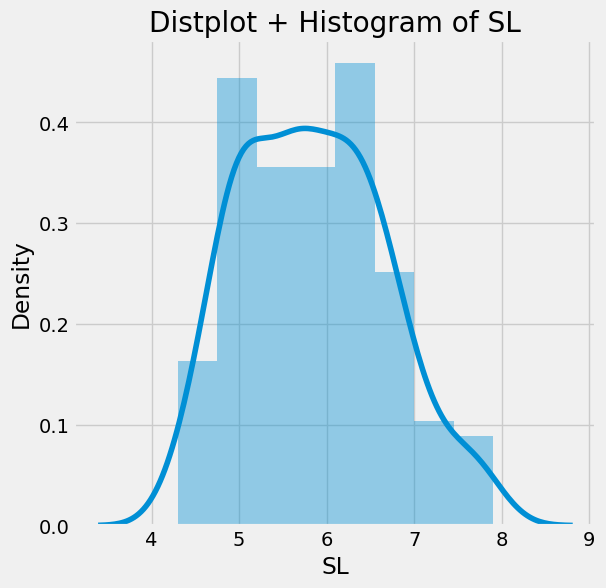

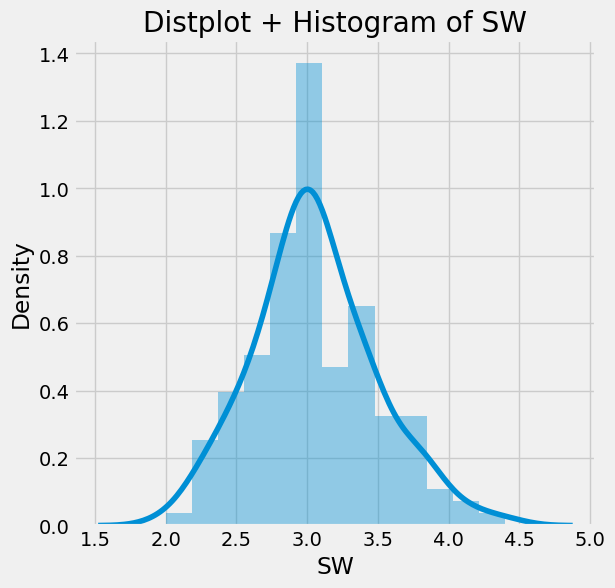

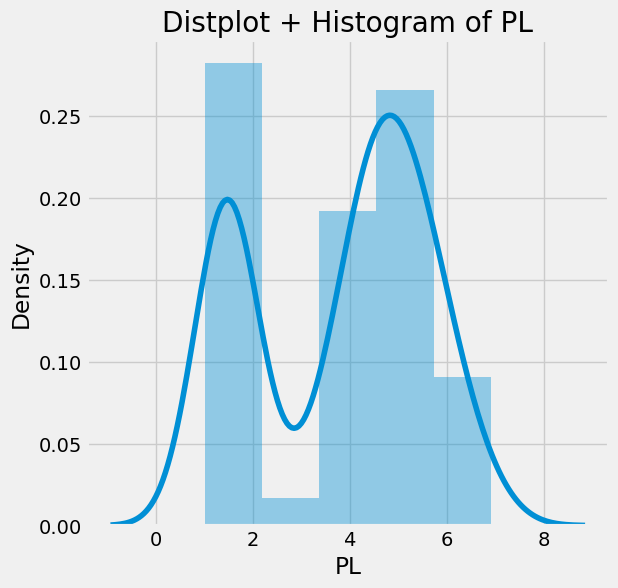

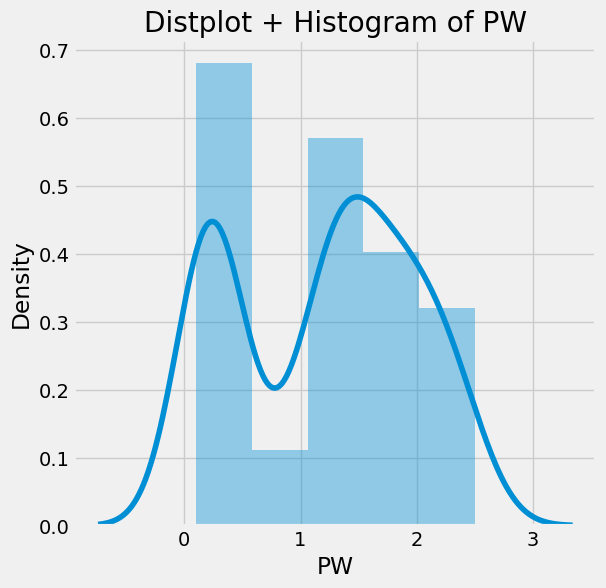

In [12]:
#Distplot & Histogram of numeric features:
for i in numeric_data.columns:
    f,ax = plt.subplots(figsize=(6,6))
    sns.distplot(a=numeric_data[i],ax=ax)
    ax.set_title("Distplot + Histogram of "+i)
    plt.show()


INSIGHTS FROM DISTPLOT/HISTOGRAM:
- Most normal distribution-like distribution is Sepal Width.
- Then, Sepal Length is second normal-like distribution.
- Petal length and Petal width is having bi-modal distribution.

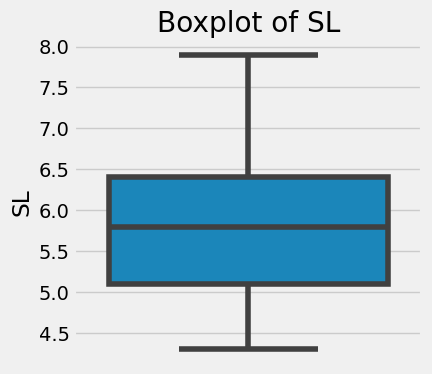

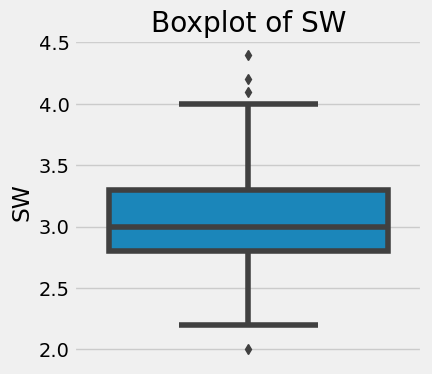

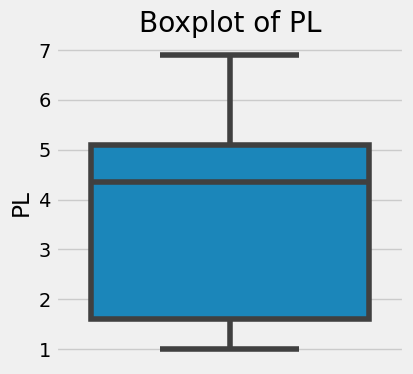

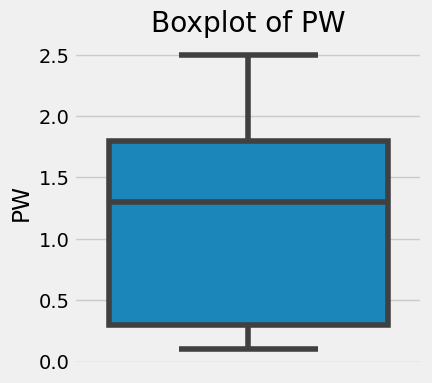

In [13]:
#Boxplot of numeric features:
for i in numeric_data.columns:
    f, ax = plt.subplots(figsize=(4,4))
    sns.boxplot(data=df, y=i, ax= ax)
    ax.set_title("Boxplot of "+i)
    plt.show()

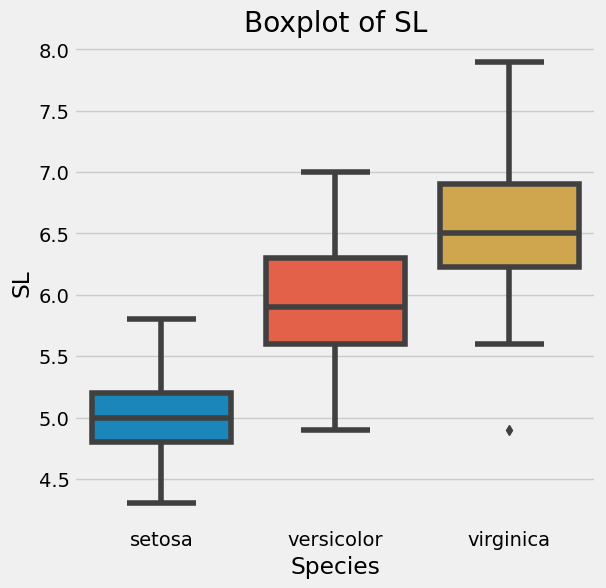

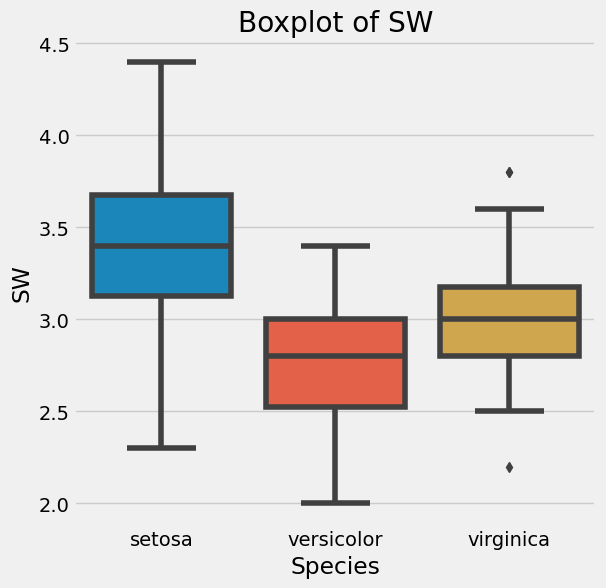

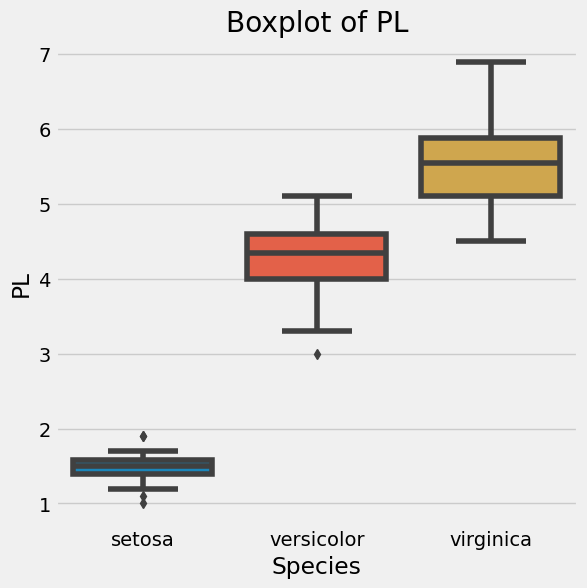

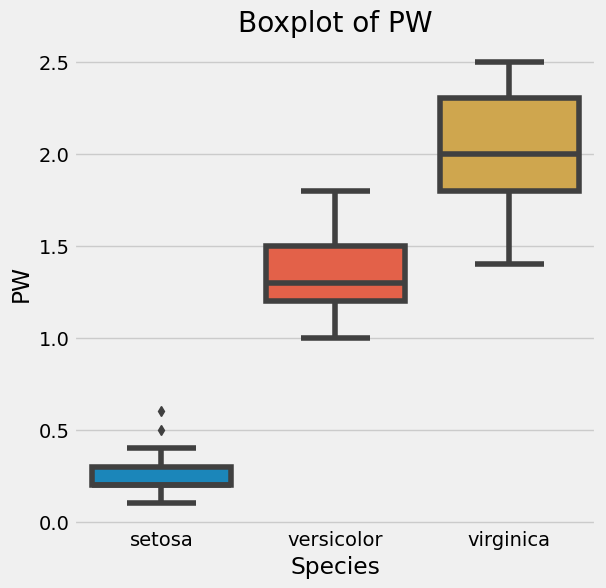

In [14]:
#Boxplot of numeric features:
for i in numeric_data.columns:
    f, ax = plt.subplots(figsize=(6,6))
    sns.boxplot(data=df, y=i, x='Species',ax= ax)
    ax.set_title("Boxplot of "+i)
    plt.show()

INSIGHTS FROM BOXPLOT:
- Petal Length & Petal Width are a very important feature since Setosa flowers can easily be distinguished from other classes using only these two *Features!*
- Petal Width is having some outlier values as can be seen from its standalone boxplot.
- Virginica flowers tend to have larger PL & PW values as compared to other species.

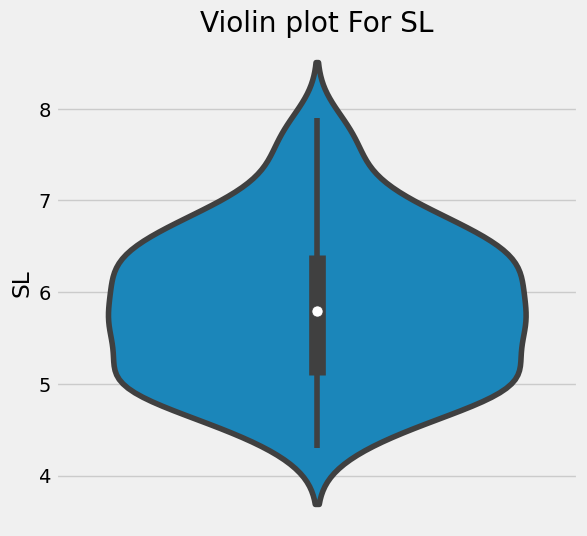

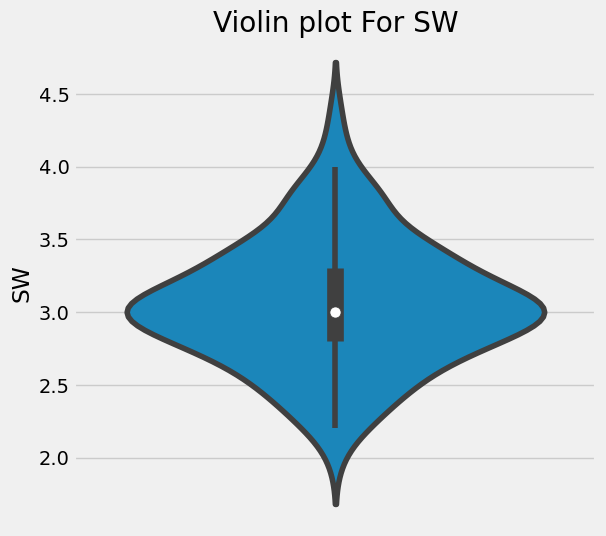

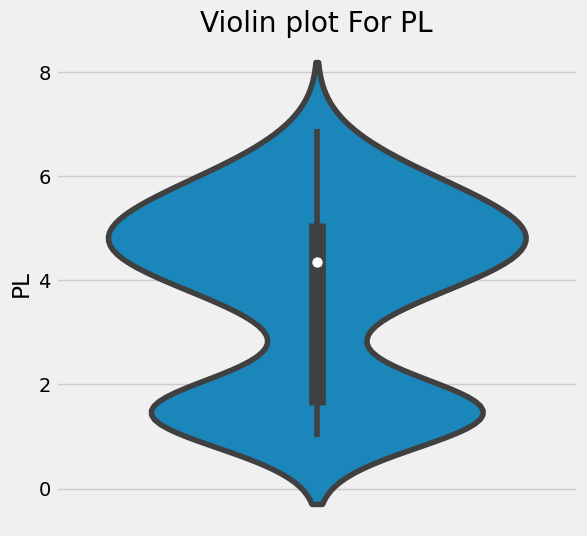

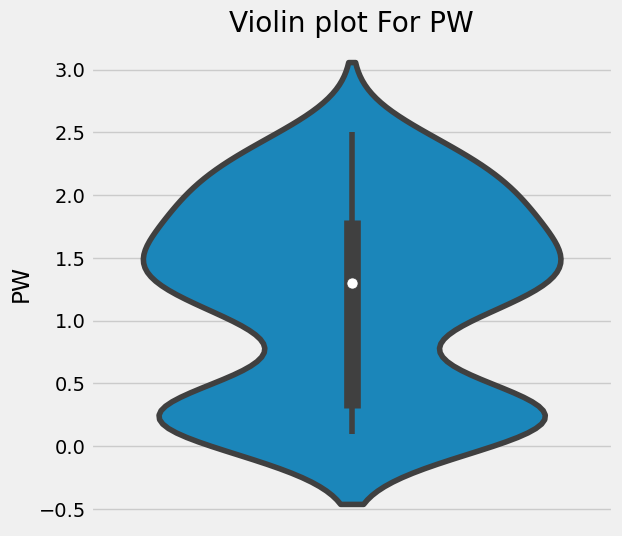

In [15]:
#Violin plot of numeric features:
import seaborn as sns
for i in numeric_data.columns:
    f, ax = plt.subplots(figsize=(6,6))
    plt.title("Violin plot For "+i)
    sns.violinplot(data=df,y=i,ax= ax)
    plt.show()

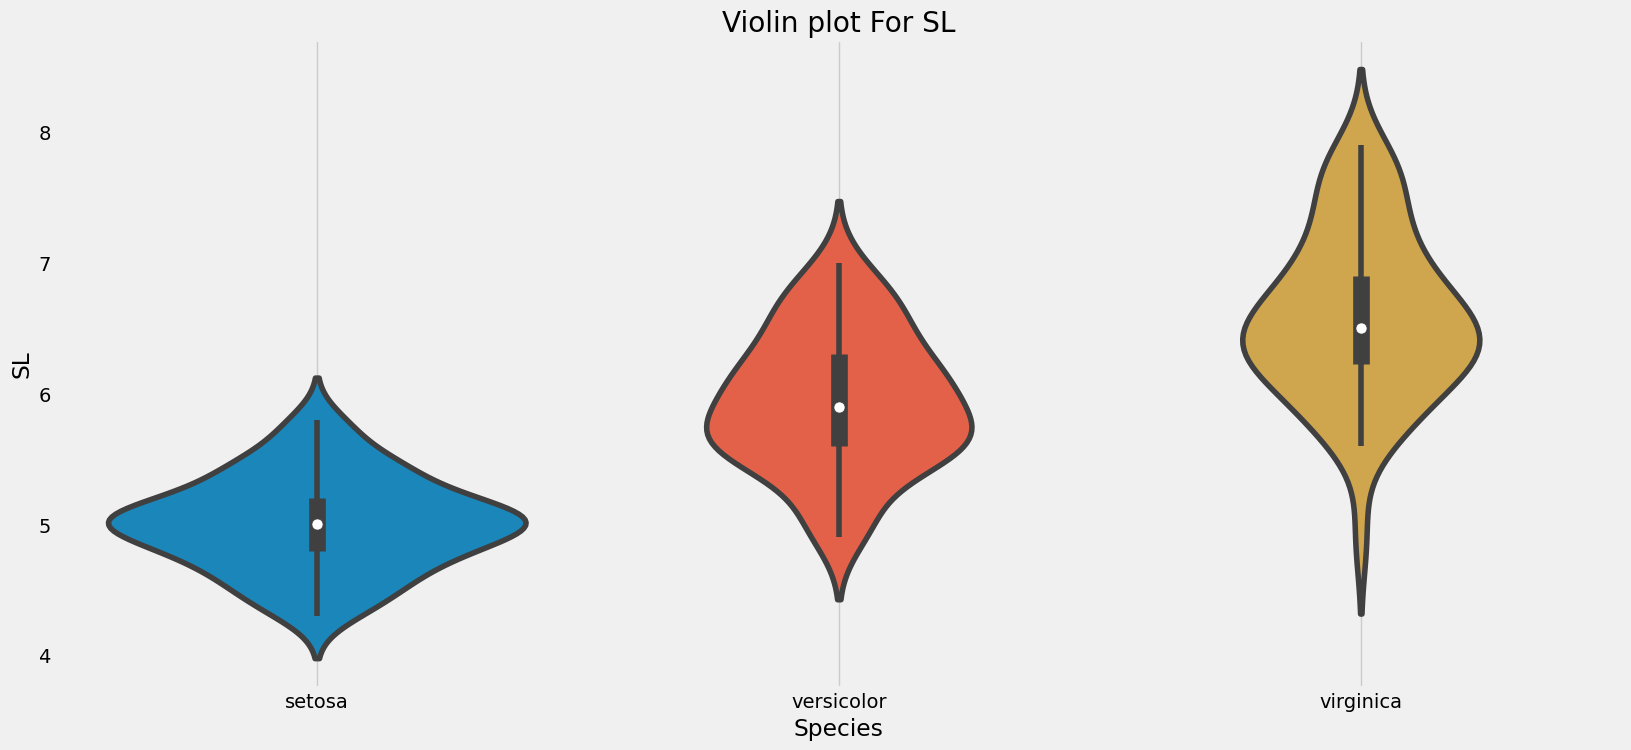

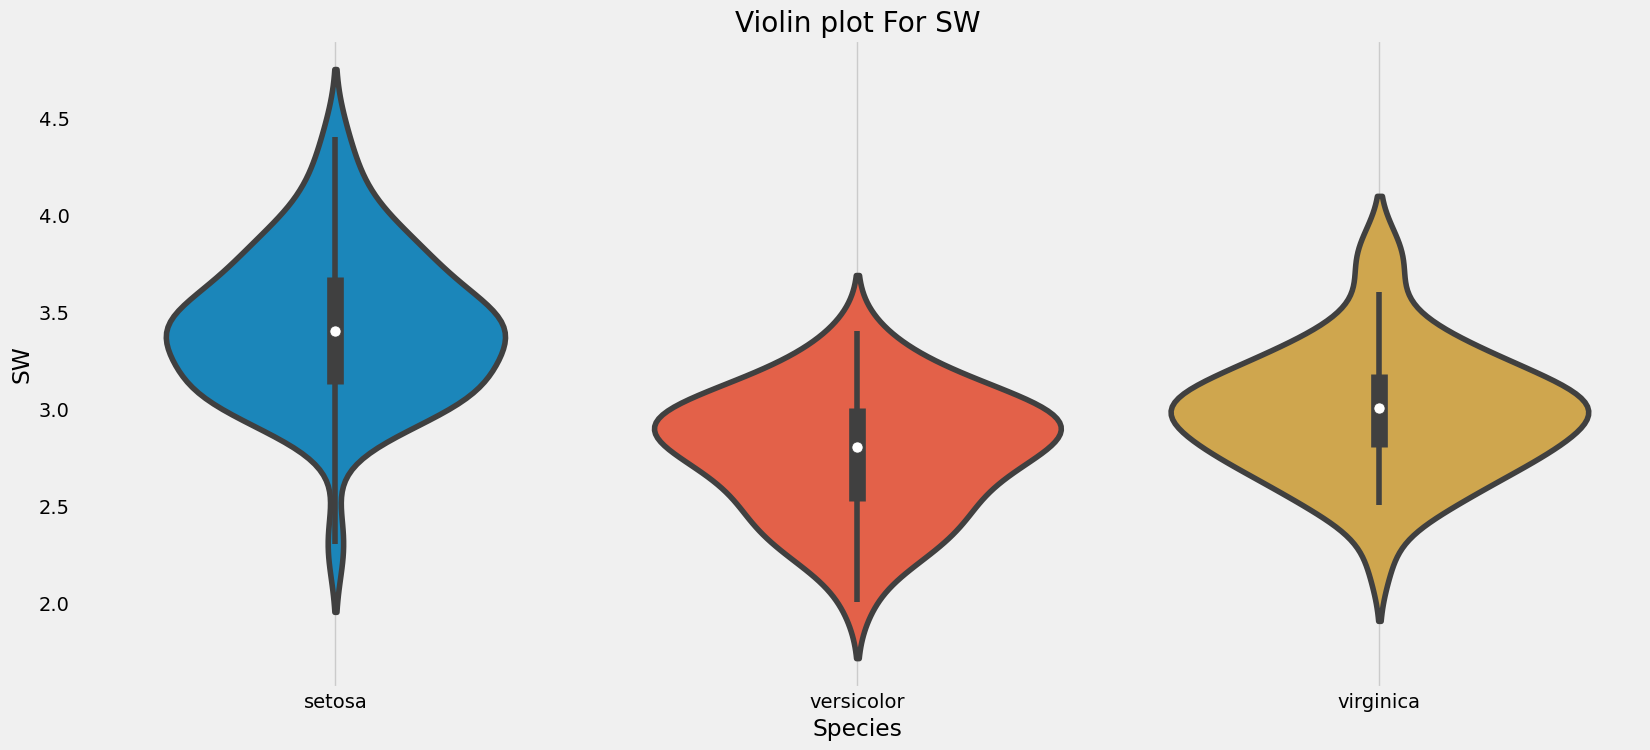

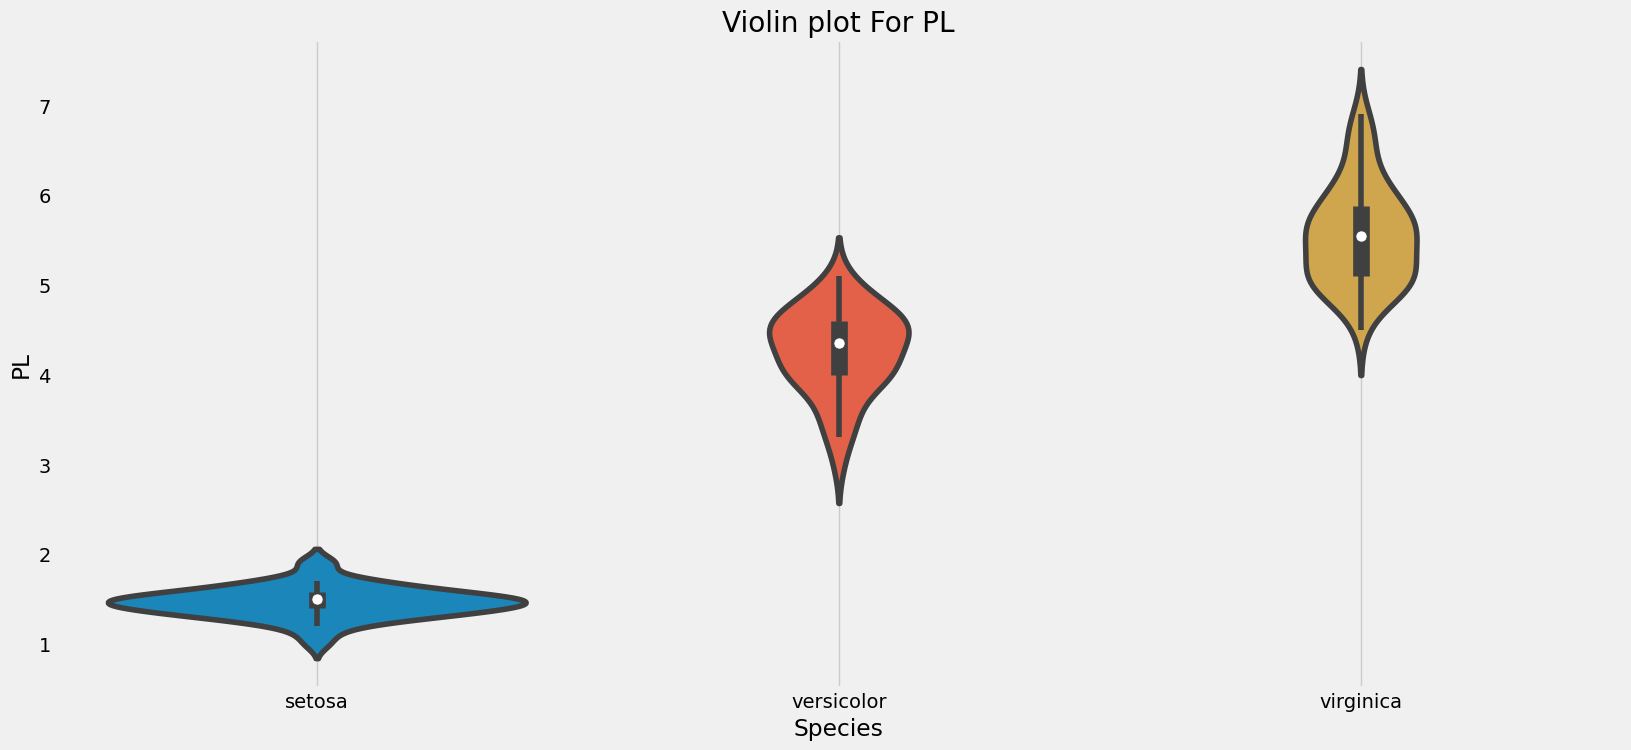

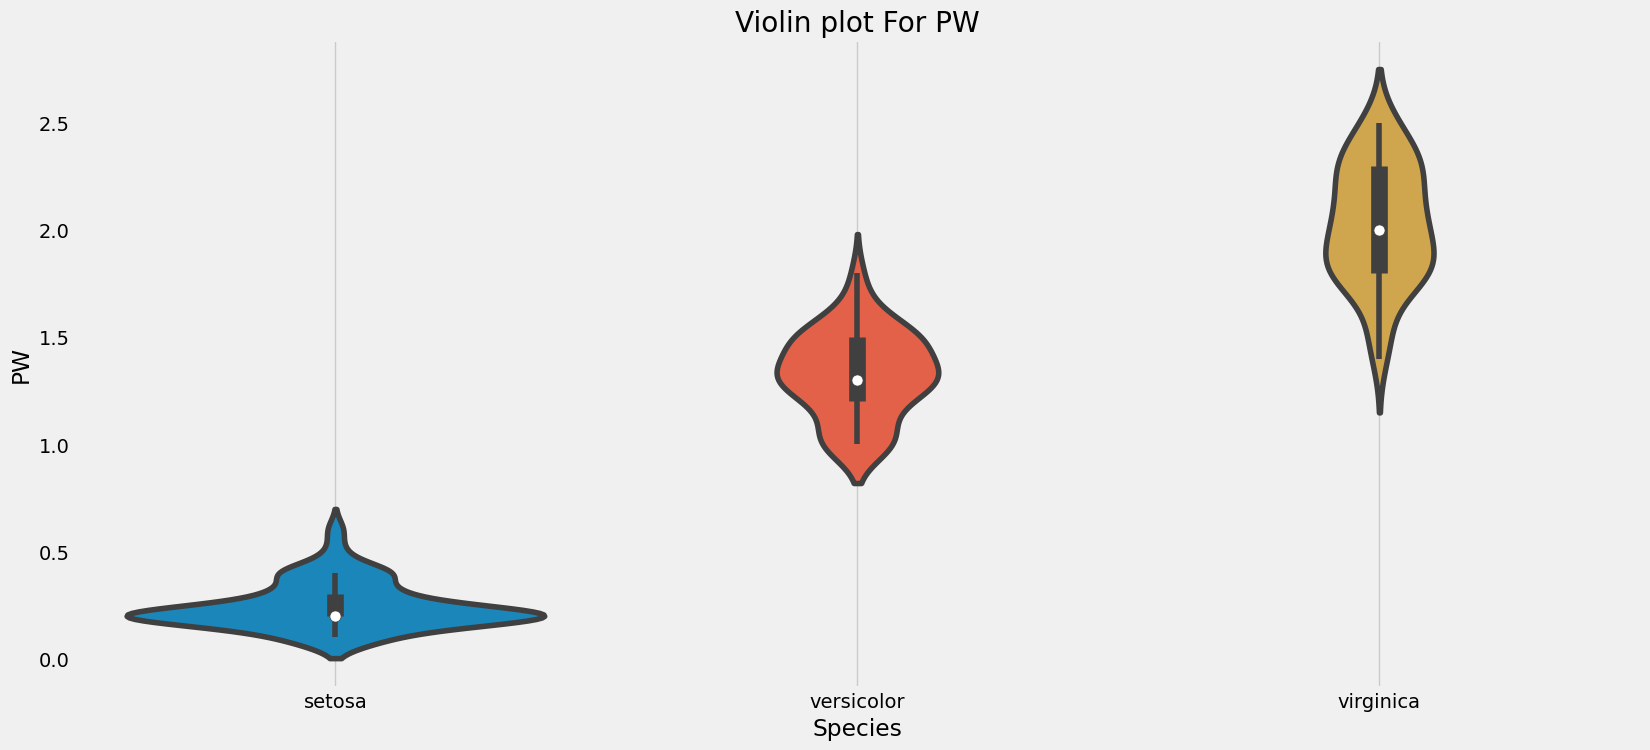

In [16]:
#Violin plot of numeric features grouped by Species:
import seaborn as sns
for i in numeric_data.columns:
    plt.title("Violin plot For "+i)
    sns.violinplot(data=df,y=i,x='Species')
    plt.grid()
    plt.show()

INSIGHTS FROM VIOLIN PLOTS:
- Setosa can easily be separated from rest of classes Using **PW** or **PL**.
- Distribution of PL & PW is having very high KURTOSIS for **SETOSA** flowers.

In [17]:
import os
get_interim_data_script_file = os.path.join(os.pardir,'src','data','get_interim_data.py')

In [18]:
%%writefile $get_interim_data_script_file
import os
import pandas as pd
import logging
from sklearn.preprocessing import LabelEncoder



def main(project_dir):
    
    """main method to get the process the data data and store it as processed_iris.csv
    """
    
    #Initializing logger:
    Logger=logging.getLogger(__name__)

    Logger.info("Getting raw data from local")
    #Getting raw data and processing it:
    raw_data_file = os.path.join(project_dir,'data','raw','Iris.csv')


    Logger.info("Processing raw data")
    df = pd.read_csv(raw_data_file,index_col='Id') \
    .assign(Species = lambda x : x.Species.str.slice(5,)) \
    .rename(columns=dict(zip(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],["SL","SW","PL","PW"])))

    Logger.info("Saving processed data")
    destination_path = os.path.join(project_dir,'data','interim','interim_iris.csv')
    df.to_csv(destination_path)

if __name__ == '__main__':
    project_dir = os.path.join(os.path.dirname(__file__),os.pardir,os.pardir)

    #Setting up logger:
    logging.basicConfig(filename = 'file.log', \
    level = logging.INFO, \
    format = '%(asctime)s:%(levelname)s:%(name)s:%(message)s')

    #call the main method:
    main(project_dir)


Overwriting ..\src\data\get_interim_data.py


In [19]:
! python $get_interim_data_script_file